In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
Train_data = pd.read_csv("titanic/train.csv")
Test_data = pd.read_csv("titanic/test.csv")
All_data = pd.concat([Train_data, Test_data], sort=True).reset_index(drop=True)

In [4]:
print('Training Shape = {}'.format(Train_data.shape))
print('Test Shape = {}'.format(Test_data.shape))
print('Name of columns in Training dataframe = {}'.format(Train_data.columns))
print('Name of columns in Test dataframe = {}'.format(Test_data.columns))


Training Shape = (891, 12)
Test Shape = (418, 11)
Name of columns in Training dataframe = Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Name of columns in Test dataframe = Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
print('missing values of Train ')
print('\n')
for column in Train_data.columns.tolist():          
    print('{} column: {}'.format(column, Train_data[column].isnull().sum()))

missing values of Train 


PassengerId column: 0
Survived column: 0
Pclass column: 0
Name column: 0
Sex column: 0
Age column: 177
SibSp column: 0
Parch column: 0
Ticket column: 0
Fare column: 0
Cabin column: 687
Embarked column: 2


In [10]:
print('missing values of Test ')
print('\n')
for column in Test_data.columns.tolist():          
    print('{} column: {}'.format(column, Test_data[column].isnull().sum()))


missing values of Test 


PassengerId column: 0
Pclass column: 0
Name column: 0
Sex column: 0
Age column: 86
SibSp column: 0
Parch column: 0
Ticket column: 0
Fare column: 1
Cabin column: 327
Embarked column: 0


In [11]:
All_data['Age'] = All_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
All_data['Embarked'] = All_data['Embarked'].fillna('S')
Class = All_data.groupby(['Pclass'])['Fare'].mean()
All_data['Fare'] = All_data['Fare'].fillna(Class[3])

In [12]:
check_nan = All_data['Cabin'].isnull()
All_data['newCabin']=np.where(check_nan == False, All_data['Cabin'].astype(str).str[0],0)
All_data['newCabin']

0       0
1       C
2       0
3       C
4       0
       ..
1304    0
1305    C
1306    0
1307    0
1308    0
Name: newCabin, Length: 1309, dtype: object

In [13]:
re = '([A-Za-z]+)\.'
for data in All_data['Name']:
    All_data['Title'] = All_data.Name.str.extract(re, expand=False)
All_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [14]:
All_data['Is_Married'] = 0
All_data['Is_Married'].loc[All_data['Title'] == 'Mrs'] = 1


In [15]:
All_data.groupby(['Title','Sex'])['Title'].count()

Title     Sex   
Capt      male        1
Col       male        4
Countess  female      1
Don       male        1
Dona      female      1
Dr        female      1
          male        7
Jonkheer  male        1
Lady      female      1
Major     male        2
Master    male       61
Miss      female    260
Mlle      female      2
Mme       female      1
Mr        male      757
Mrs       female    197
Ms        female      2
Rev       male        8
Sir       male        1
Name: Title, dtype: int64

In [16]:
female_titles = ['Ms', 'Mrs', 'Mme', 'Mlle', 'Miss', 'Lady', 'Dona', 'Countess']
male_titles = ['Sir', 'Mr', 'Major', 'Jonkheer', 'Don']
other_titles = ['Rev', 'Dr', 'Col', 'Capt']
for data in All_data['Title']:
    All_data['Title'] = All_data['Title'].replace(female_titles, 'Female')
    All_data['Title'] = All_data['Title'].replace(male_titles, 'Male')
    All_data['Title'] = All_data['Title'].replace(other_titles, 'Other')
All_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,newCabin,Title,Is_Married
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Male,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,Female,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Female,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,Female,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,0,Male,0
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,C,Female,0
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,0,Male,0
1307,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,0,Male,0


In [17]:
c1 = 10
c2 = 20
y1 = 30
y2 = 40
ag1 = 50
ag2 = 60
old= 70

def discretize_Age (Age) :
    if Age < c1 : 
        return "0"
    elif Age < c2 :
        return "1"
    elif Age < y1 :
        return "2"
    elif Age < y2 :
        return "3"
    elif Age < ag1 :
        return "4"
    elif Age < ag2 :
        return "5"
    elif Age < old :
        return "6"
    else :
        return "7"

All_data['AgeRange'] = (All_data['Age'].apply(discretize_Age)).astype('int')
All_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,newCabin,Title,Is_Married,AgeRange
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Male,0,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,Female,1,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Female,0,2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,Female,1,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Male,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,0,Male,0,2
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,C,Female,0,3
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,0,Male,0,3
1307,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,0,Male,0,2


In [18]:
All_data['Family'] = All_data['SibSp']+All_data['Parch']

In [19]:
All_data.drop(['Ticket','Cabin','Name'], axis=1, inplace=True)

All_data['Sex'] = pd.factorize(All_data['Sex'])[0]
All_data['Embarked'] = pd.factorize(All_data['Embarked'])[0]
All_data['newCabin'] = pd.factorize(All_data['newCabin'])[0]
All_data['Title'] = pd.factorize(All_data['Title'])[0]


In [20]:
Train = All_data.head(891)
Test = All_data.tail(418)
Test.drop(['Survived'], axis=1, inplace=True)


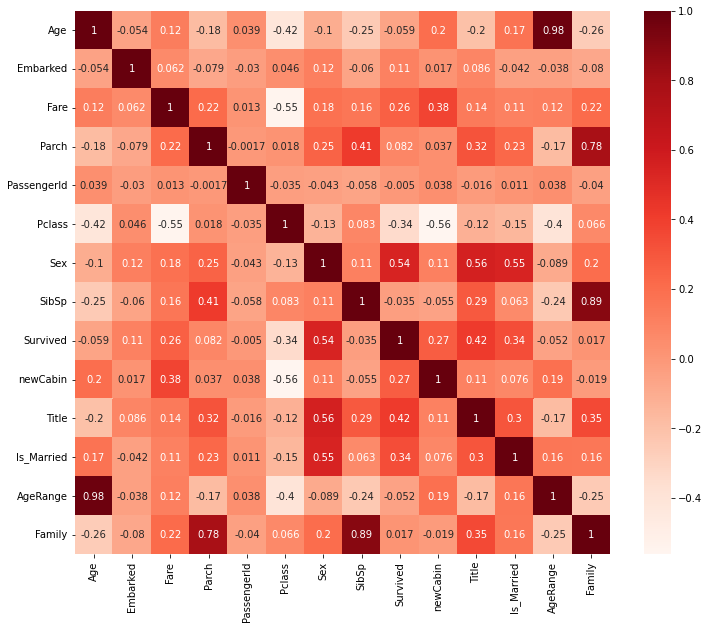

In [21]:
plt.figure(figsize=(12,10))
cor_Train = Train.corr()
sns.heatmap(cor_Train, annot=True, cmap=plt.cm.Reds)
plt.show()

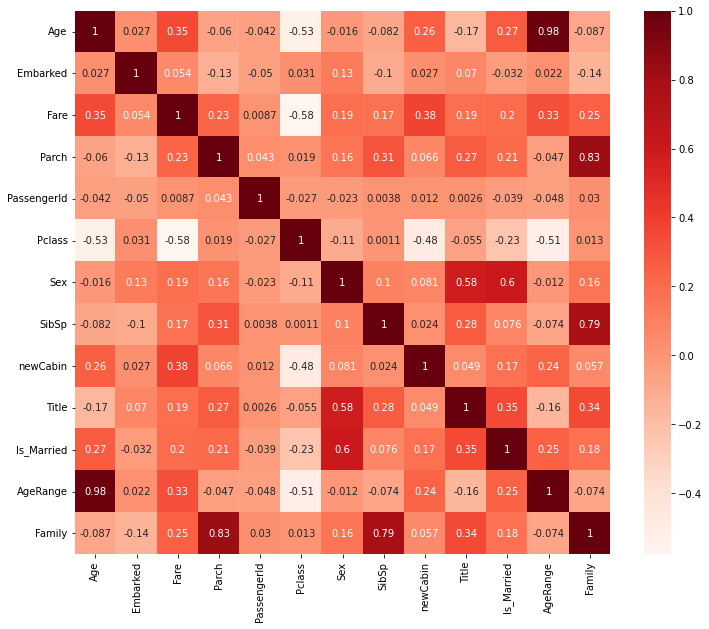

In [22]:
plt.figure(figsize=(12,10))
cor_Test = Test.corr()
sns.heatmap(cor_Test, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
new_features = ['Embarked', 'Sex', 'newCabin', 'Title', 'Pclass', 'Family', 'Is_Married', 'AgeRange']

X = pd.get_dummies(Train[new_features])
X_Test = pd.get_dummies(Test[new_features])
y = Train['Survived']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X_Test)
for i in range(predictions.size):
    if predictions[i]>=0.55:
        predictions[i]=1
    else:
        predictions[i]=0
        
predictions=predictions.astype('int')

output = pd.DataFrame({'PassengerId': Test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
